# Decision Trees

In [3]:
# Imports
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image, display
import pydotplus
import numpy as np
def jupyter_graphviz(m, **kwargs):
    dot_data = StringIO()
    export_graphviz(m, dot_data, **kwargs)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    display(Image(graph.create_png()))

In [4]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
np.random.seed(0)
X = np.random.randn(10, 4)
y = np.array(["foo", "bar", "baz"])[np.random.randint(0, 3, 10)]
clf = DecisionTreeClassifier(random_state=42).fit(X, y)
export_graphviz(clf)

'digraph Tree {\nnode [shape=box] ;\n0 [label="X[2] <= 0.149\\ngini = 0.62\\nsamples = 10\\nvalue = [2, 3, 5]"] ;\n1 [label="gini = 0.0\\nsamples = 4\\nvalue = [0, 0, 4]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="X[0] <= -0.896\\ngini = 0.611\\nsamples = 6\\nvalue = [2, 3, 1]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 0, 1]"] ;\n2 -> 3 ;\n4 [label="X[3] <= 0.356\\ngini = 0.48\\nsamples = 5\\nvalue = [2, 3, 0]"] ;\n2 -> 4 ;\n5 [label="X[3] <= -0.503\\ngini = 0.444\\nsamples = 3\\nvalue = [2, 1, 0]"] ;\n4 -> 5 ;\n6 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 1, 0]"] ;\n5 -> 6 ;\n7 [label="gini = 0.0\\nsamples = 2\\nvalue = [2, 0, 0]"] ;\n5 -> 7 ;\n8 [label="gini = 0.0\\nsamples = 2\\nvalue = [0, 2, 0]"] ;\n4 -> 8 ;\n}'

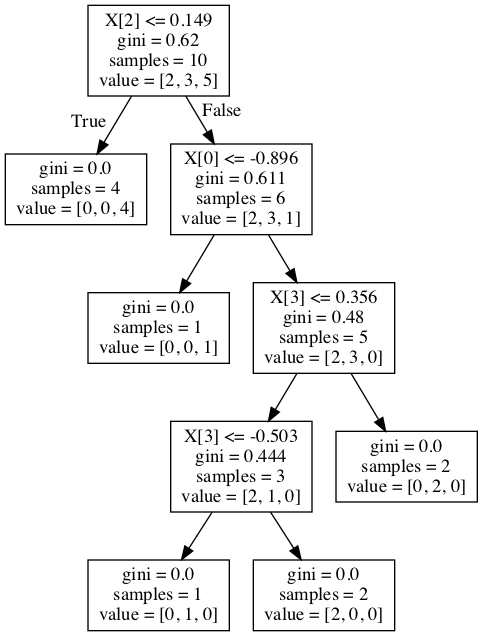

In [5]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

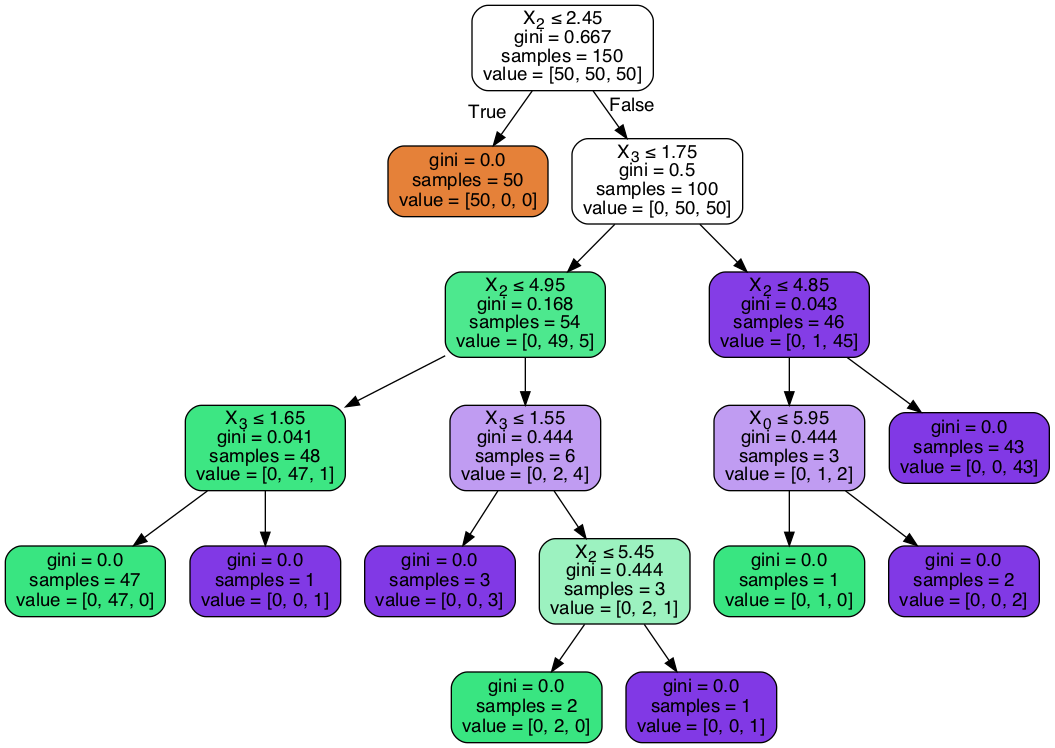

In [6]:
import sklearn.datasets as datasets
import pandas as pd

iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(df, y)

jupyter_graphviz(dtree, filled=True, rounded=True, special_characters=True)

# Gini Impurity

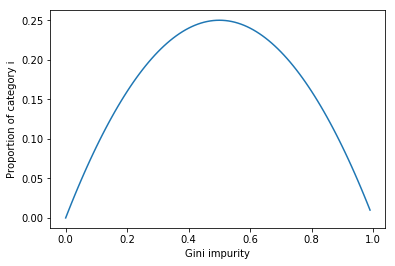

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
p_i = np.arange(0,1,0.01)
gini = p_i*(1- p_i)
plt.plot(p_i, gini); plt.xlabel("Gini impurity"); plt.ylabel("Proportion of category i");plt.savefig("gini.png");

# Car Decision Tree

In [8]:

cols = ["Car Make" , "Type" , "Colour" , "Price" , "Mileage" , "Bought?"]
data = [["VW" , "Polo" , "Grey" , 2000 , 82000 , True],
        ["Ford" , "Fiesta" , "Purple" , 1795 , 95000 , True],
        ["Ford" , "Fiesta" , "Grey" , 1990 , 90000 , False],
        ["VW" , "Golf" , "Red" , 1800 , 120000 , True],
        ["VW" , "Polo" , "Grey" , 900 , 150000 , False], 
        ["Ford" , "Ka" , "Yellow" , 1400 , 100000 , True]]
data_df = pd.DataFrame(data, columns = cols)
data_df

,Car Make,Type,Colour,Price,Mileage,Bought?
0,VW,Polo,Grey,2000,82000,True
1,Ford,Fiesta,Purple,1795,95000,True
2,Ford,Fiesta,Grey,1990,90000,False
3,VW,Golf,Red,1800,120000,True
4,VW,Polo,Grey,900,150000,False
5,Ford,Ka,Yellow,1400,100000,True


Decision tree algorithm library function from sklearn can't deal with categorical data.
Use get_dummies to give binary proxy

In [9]:
df = data_df[["Car Make" , "Type" , "Colour" , "Price" , "Mileage"]]
make = pd.get_dummies(df["Car Make"])
model = pd.get_dummies(df["Type"])
col= pd.get_dummies(df["Colour"])
df = pd.concat([make, model, col, df["Price"], df["Mileage"]], axis=1)
y = data_df["Bought?"]
df

,Ford,VW,Fiesta,Golf,Ka,Polo,Grey,Purple,Red,Yellow,Price,Mileage
0,0,1,0,0,0,1,1,0,0,0,2000,82000
1,1,0,1,0,0,0,0,1,0,0,1795,95000
2,1,0,1,0,0,0,1,0,0,0,1990,90000
3,0,1,0,1,0,0,0,0,1,0,1800,120000
4,0,1,0,0,0,1,1,0,0,0,900,150000
5,1,0,0,0,1,0,0,0,0,1,1400,100000


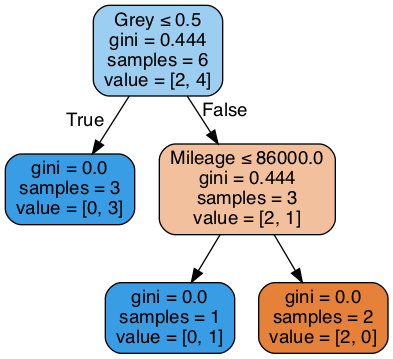

In [10]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(df, y)
jupyter_graphviz(dtree, filled=True, feature_names=df.columns, rounded=True, special_characters=True)

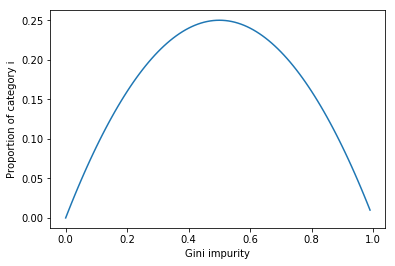

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
p_i = np.arange(0,1,0.01)
gini = p_i*(1- p_i)
plt.plot(p_i, gini); plt.xlabel("Gini impurity"); plt.ylabel("Proportion of category i");plt.savefig("gini.png");

# Demo with 3 classes

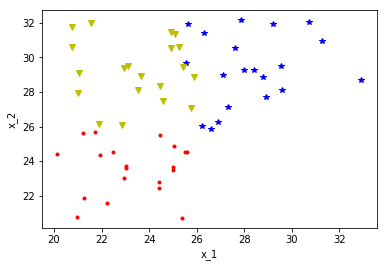

In [11]:
n = 20
np.random.seed(2000)
x1 = (np.random.rand(n, 2)*8)+25
x2 = (np.random.rand(n,2)*6) +20
x3 = (np.random.rand(n, 2)*6)+[20,26]
plt.plot(x1[:,0], x1[:,1], 'b*'); plt.plot(x2[:,0],x2[:,1], 'r.'); plt.plot(x3[:,0],x3[:,1], 'yv')
plt.xlabel("x_1"); plt.ylabel("x_2");

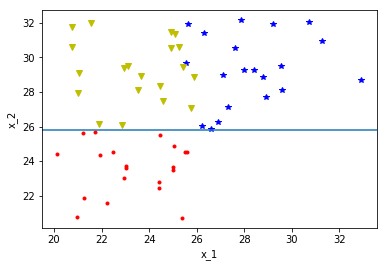

In [12]:
plt.plot(x1[:,0], x1[:,1], 'b*'); plt.plot(x2[:,0],x2[:,1], 'r.'); plt.plot(x3[:,0],x3[:,1], 'yv')
plt.xlabel("x_1"); plt.ylabel("x_2");
plt.axhline(y=25.79); plt.savefig("overfit_1.png");

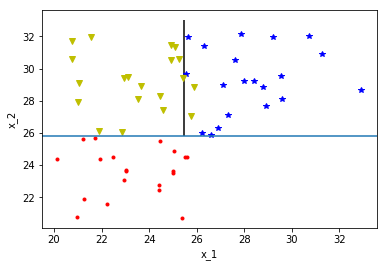

In [13]:
plt.plot(x1[:,0], x1[:,1], 'b*'); plt.plot(x2[:,0],x2[:,1], 'r.'); plt.plot(x3[:,0],x3[:,1], 'yv')
plt.xlabel("x_1"); plt.ylabel("x_2");
plt.axhline(y=25.79)
plt.vlines(25.48, ymin=25.79, ymax = 33);plt.savefig("overfit_2.png");

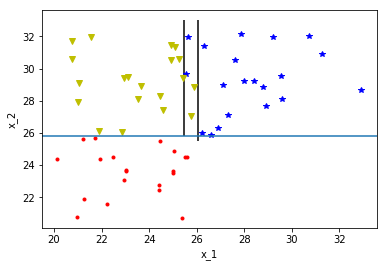

In [14]:
plt.plot(x1[:,0], x1[:,1], 'b*'); plt.plot(x2[:,0],x2[:,1], 'r.'); plt.plot(x3[:,0],x3[:,1], 'yv')
plt.xlabel("x_1"); plt.ylabel("x_2");
plt.axhline(y=25.79)
plt.vlines(25.48, ymin=25.79, ymax = 33)
plt.vlines(26.05, ymin=25.48, ymax = 33);plt.savefig("overfit_3.png");

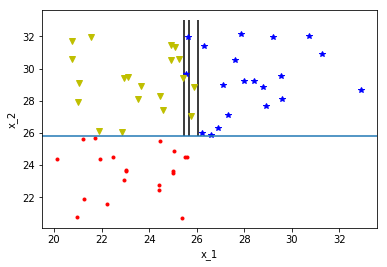

In [15]:
plt.plot(x1[:,0], x1[:,1], 'b*'); plt.plot(x2[:,0],x2[:,1], 'r.'); plt.plot(x3[:,0],x3[:,1], 'yv')
plt.xlabel("x_1"); plt.ylabel("x_2");
plt.axhline(y=25.79)
plt.vlines(25.48, ymin=25.79, ymax = 33)
plt.vlines(26.05, ymin=25.79, ymax = 33)
plt.vlines(25.7, ymin=25.79, ymax = 33);plt.savefig("overfit_4.png");

# Decision Tree for 3 classes

In [27]:
# turn data in to training data
X1 = np.array([(x[0], x[1],0) for x in x1]); X2 = np.array([(x[0],x[1],1) for x in x2]); X3 = np.array([(x[0],x[1],2) for x in x3])
X = np.concatenate([X1, X2, X3])
X_data = pd.DataFrame(X[:,:2])
y_data = pd.DataFrame(X[:,2], dtype=int)

In [28]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_data, y_data);

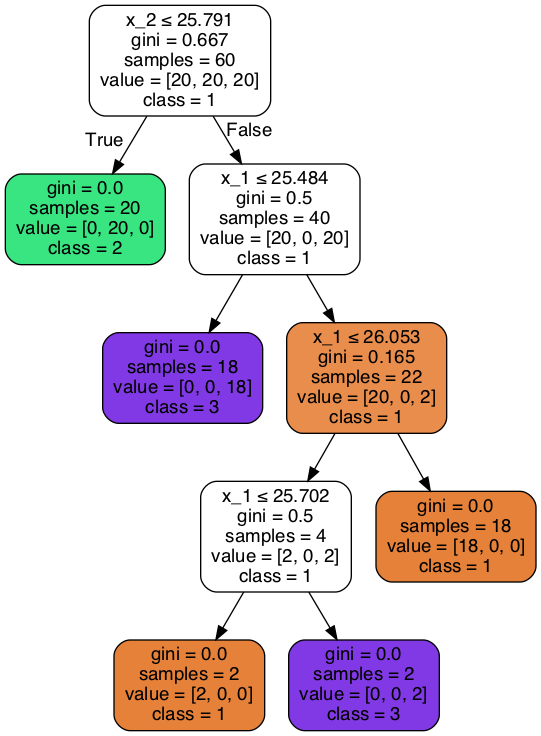

In [29]:
jupyter_graphviz(dtree, filled=True, feature_names=["x_1", "x_2"], class_names=["1", "2", "3"], rounded=True, special_characters=True)

In [32]:
dtree = DecisionTreeClassifier(random_state=42, criterion="entropy")
dtree.fit(X_data, y_data);

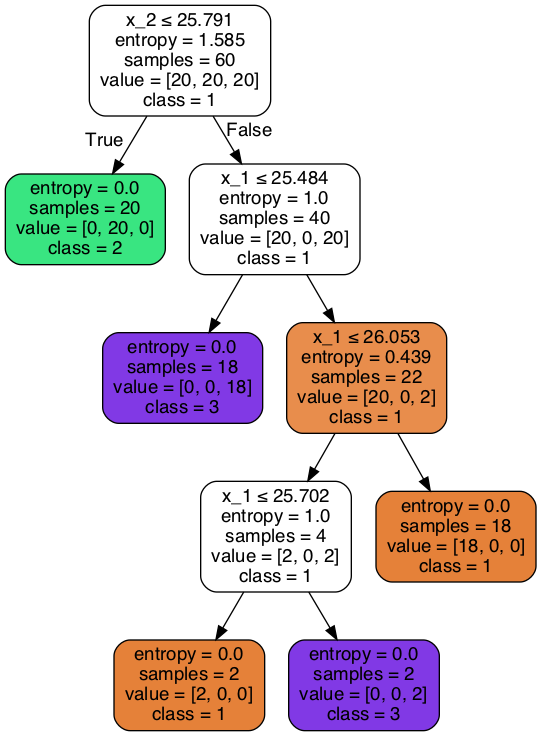

In [31]:
jupyter_graphviz(dtree, filled=True, feature_names=["x_1", "x_2"], class_names=["1", "2", "3"], rounded=True, special_characters=True)

In [20]:
def entropy(S):
    dums = pd.get_dummies(S)
    n, l = dums.shape
    tot = 0
    for i in range(l):
        p_i = sum(dums[i])/n
        ent = p_i * np.log2(p_i)
        tot += ent
    return -tot

def gini(S):
    dums = pd.get_dummies(S)
    n,l = dums.shape
    tot = 0
    for i in range(l):
        p_i = sum(dums[i]/n)
        gi = p_i*(1-p_i)
        tot+= gi
    return tot

print("Gini [1,1,0,0,1] = ", gini([1, 1, 0, 0, 1]))
print("Entropy [1,1,0,0,1] = ", entropy([1,1,0,0,1]))

Gini [1,1,0,0,1] =  0.48
Entropy [1,1,0,0,1] =  0.9709505944546686


# Entropy

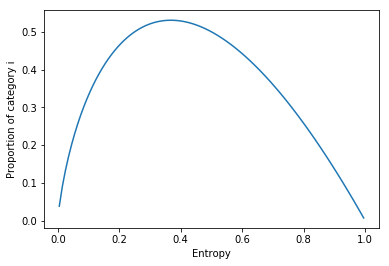

In [22]:
p_i = np.arange(0.005,1,0.01)
ent = -p_i*np.log2(p_i)
plt.plot(p_i, ent); plt.xlabel("Entropy"); plt.ylabel("Proportion of category i");plt.savefig("entropy.png");